In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

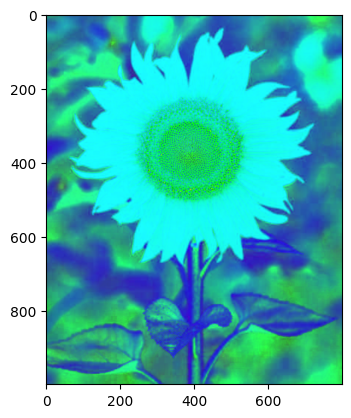

In [2]:
# Load img using opencv
img = 'sunflower.jpg'
image = cv.imread(img)

# Define range of blue color in HSV
img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)


plt.imshow(img_hsv)

যখন আমরা একটি ইমেজকে HSV ফরম্যাটে কনভার্ট করি এবং তারপরে একটি নির্দিষ্ট রঙের রেঞ্জ, যেমন আপনার ক্ষেত্রে হলুদ রঙের জন্য, lower_bound এবং upper_bound সেট করি, তখন মূলত যা ঘটে তা হলো:

- ইমেজের প্রতিটি পিক্সেলকে HSV ফরম্যাটে রূপান্তর করা হয়।
- এরপর আমরা cv2.inRange() ফাংশন ব্যবহার করি। এই ফাংশনটি HSV ইমেজের প্রতিটি পিক্সেলকে পরীক্ষা করে দেখে যে, সেই পিক্সেলটি আমাদের নির্দিষ্ট করা lower_bound এবং upper_bound এর মধ্যে পড়ে কিনা।
- যে পিক্সেলগুলো সেই রেঞ্জের মধ্যে পড়ে (যেমন, হলুদ রঙের পিক্সেলগুলো), সেগুলোকে সাদা (255) হিসাবে চিহ্নিত করা হয় এবং যা এই রেঞ্জের বাইরে থাকে, সেগুলোকে কালো (0) হিসাবে চিহ্নিত করা হয়। এটি আসলে একটি বাইনারি মাস্ক তৈরি করে।
- এরপর সেই মাস্কটি ব্যবহার করে আমরা মূল ইমেজ থেকে শুধুমাত্র সেই রেঞ্জের মধ্যে থাকা পিক্সেলগুলো (হলুদ রঙের) ধরে রাখতে পারি এবং বাকিদের (যা রেঞ্জের মধ্যে নেই) বাদ দিয়ে দিতে পারি।
- অর্থাৎ, মাস্ক করা হলে, শুধুমাত্র নির্দিষ্ট রঙের (যেমন হলুদ) অংশগুলো থাকবে এবং অন্য সব অংশ কালো হয়ে যাবে বা মুছে যাবে।

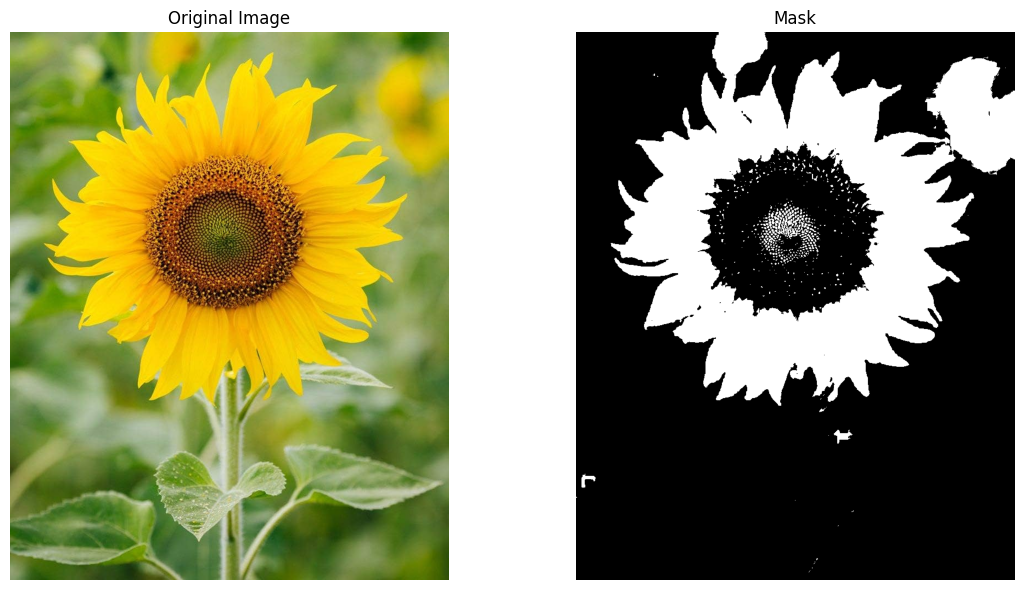

In [15]:
# detecting single color
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = 'sunflower.jpg'  # Replace with your image path
image = cv.imread(input_image_path)

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_yellow = np.array([20, 100, 100])  # Lower bound for yellow = Hue(20), Saturation(100), Value(100)
upper_yellow = np.array([30, 255, 255])  # Upper bound for yellow

# Threshold the HSV image to get only blue colors. Earlier I was using trishold, now I will use the inRange() 
# Create a mask for yellow color
mask = cv.inRange(hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)


image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

## Masking

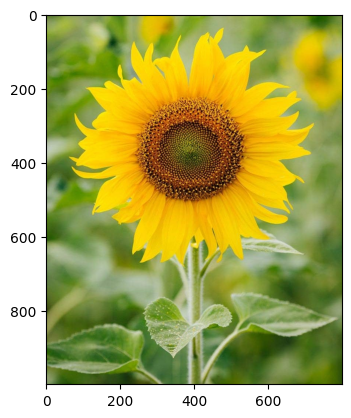

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sunflower.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

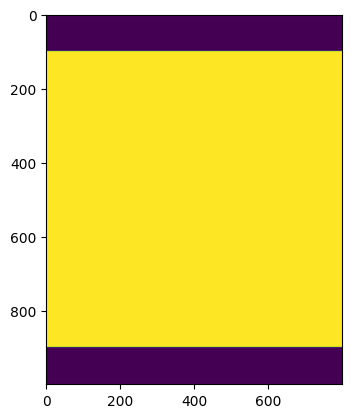

In [5]:
# Get the dimensions of the image
height, width, _ = image.shape

# Create a binary mask of the same size as the image, initialized to zeros (black)
mask = np.zeros((height, width), dtype=np.uint8)

# Define the size and position of the square
square_size = 800  # Size of the square
top_left_x = (width - square_size) // 2
top_left_y = (height - square_size) // 2

# Create a white square in the mask
mask[top_left_y:top_left_y + square_size, top_left_x:top_left_x + square_size] = 255

plt.imshow(mask)

# Convert the mask to a 3-channel mask
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# plt.imshow(mask_3channel)

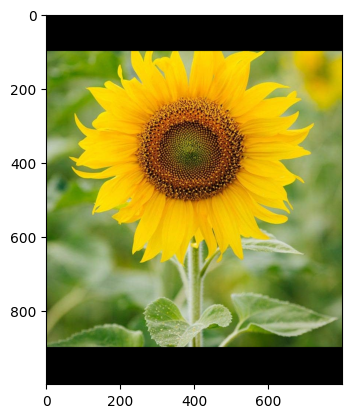

In [6]:
# Multiply the original image with the mask
result = cv2.bitwise_and(image, mask_rgb)

# Display the original image, mask, and result
# plt.imshow(image)
plt.imshow(result)

# Assignment-04

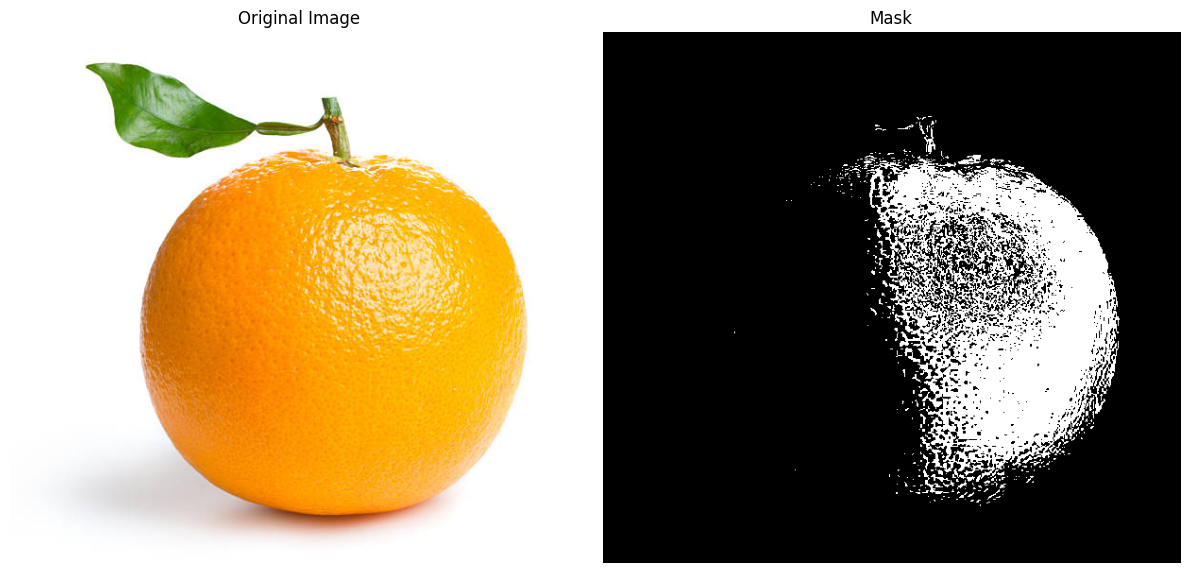

In [17]:
# detecting single color
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = 'orange-1.jpg'  # Replace with your image path
image = cv.imread(input_image_path)

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)


# Define range of yellow color in HSV
lower_yellow = np.array([20, 100, 100])  # Lower bound for yellow 
upper_yellow = np.array([25, 255, 255])  # Upper bound for yellow


# Create a mask for yellow color
mask = cv.inRange(hsv, lower_yellow, upper_yellow) 


# Apply the mask to the image.
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)


# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

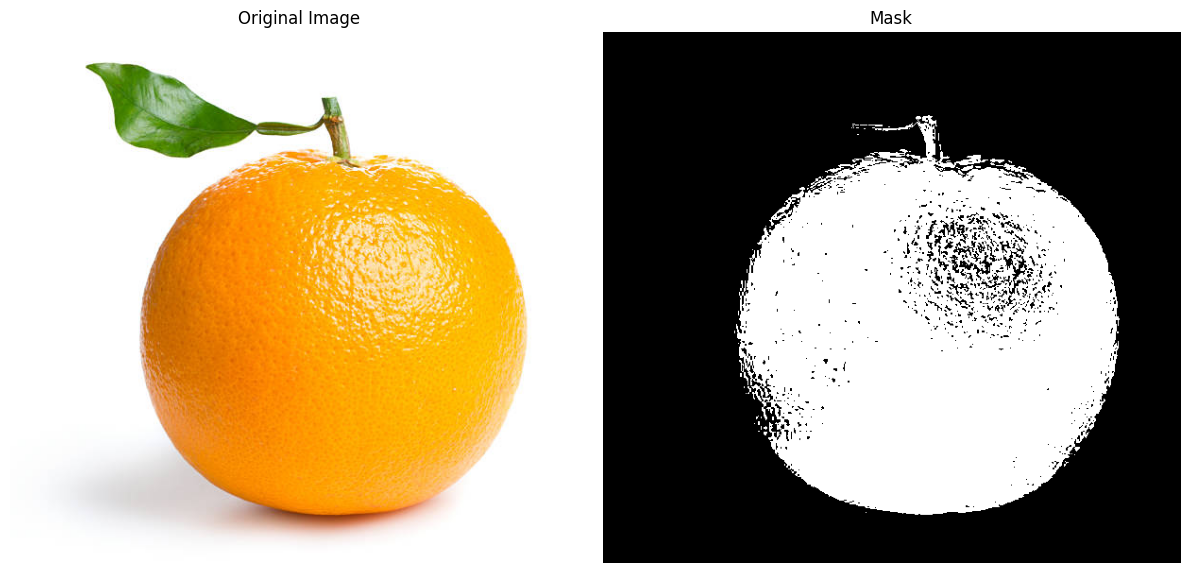

In [31]:
# detecting single color
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = 'orange-1.jpg'  # Replace with your image path
image = cv.imread(input_image_path)

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_yellow = np.array([15, 100, 100])  # Lower bound for yellow = Hue(20), Saturation(100), Value(100)
upper_yellow = np.array([30, 255, 255])  # Upper bound for yellow

# Threshold the HSV image to get only blue colors. Earlier I was using trishold, now I will use the inRange() 
# Create a mask for yellow color
mask = cv.inRange(hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)


image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

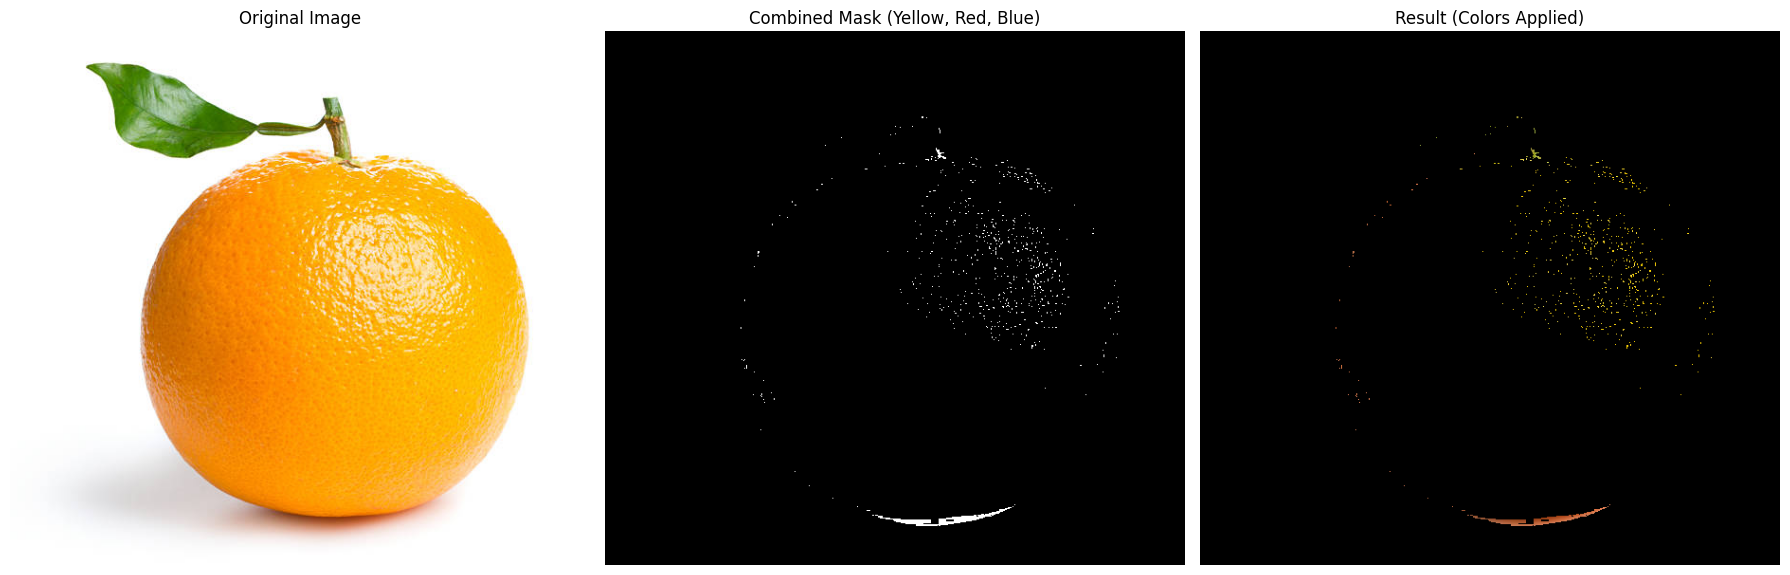

In [9]:
# Detecting multiple colors (e.g., yellow, red, and blue) without Gaussian blur or morphological operations
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = 'orange-1.jpg'  # Replace with your actual image path
image = cv.imread(input_image_path)

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define HSV ranges for different colors

# Yellow color range
lower_yellow = np.array([25, 150, 150])
upper_yellow = np.array([35, 255, 255])

# Red color range (note: red can appear at both ends of the hue spectrum, so you need two ranges)
lower_red1 = np.array([0, 150, 150])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 150, 150])
upper_red2 = np.array([180, 255, 255])

# Blue color range
lower_blue = np.array([100, 150, 150])
upper_blue = np.array([130, 255, 255])

# Create masks for each color
mask_yellow = cv.inRange(hsv, lower_yellow, upper_yellow)
mask_red1 = cv.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv.inRange(hsv, lower_red2, upper_red2)
mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

# Combine the red masks (since red has two ranges)
mask_red = cv.bitwise_or(mask_red1, mask_red2)

# Combine all masks into one
combined_mask = cv.bitwise_or(mask_yellow, cv.bitwise_or(mask_red, mask_blue))

# Apply the combined mask to the original image
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
result = cv.bitwise_and(image_rgb, image_rgb, mask=combined_mask)

# Display the original image, combined mask, and the result
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask (Yellow, Red, Blue)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result)
plt.title('Result (Colors Applied)')
plt.axis('off')

plt.tight_layout()
plt.show()